In [1]:
# Import libraries
import time
import numpy as np
from numpy import linalg as LA

import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

## MA934

## Finite Difference Method primer

Here we expand on the content of Lecture 3 and build some of the functionality required to compute numerical derivatives.

We consider a well-known setup, with

$$f(x) = \cos(x),\ x \in [0,2\pi]\ \textrm{ (and hence } f'(x) = -\sin(x) \textrm{)}.$$

You are encouraged to consider other tests (e.g. polynomials) in order to explore the implementation.

In [30]:
arr = np.random.rand(10)
print(arr)
print(arr[1:])

[0.66511836 0.44481202 0.43071263 0.7624867  0.55268011 0.8927964
 0.98478431 0.16166265 0.44102914 0.99381954]
[0.44481202 0.43071263 0.7624867  0.55268011 0.8927964  0.98478431
 0.16166265 0.44102914 0.99381954]


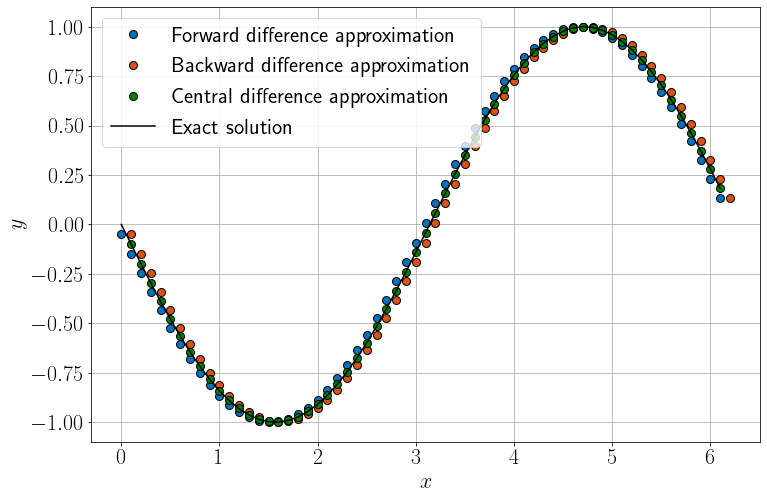

ValueError: operands could not be broadcast together with shapes (62,) (2047,) 

In [51]:
# Step size and grid
h = 0.1
x = np.arange(0, 2*np.pi, h) 

# Target function
y = np.cos(x) 

# Forward differences as an example - using diff 
# As always, please explore the documentation: https://numpy.org/doc/stable/reference/generated/numpy.diff.html
y_forwarddiff = np.diff(y)/h 

# Consider where we compute the derivatives and translate grid
x_forwarddiff = x[:-1:] 

# Reference(exact solution)
y_exact_FD = -np.sin(x_forwarddiff) 

# Backward difference
y_backwarddiff = (y[1:] - y[:-1])/h
x_backwarddiff = x[1:]
y_exact_BD = -np.sin(x_backwarddiff)

# Central difference
y_centraldiff = (y[2:] - y[:-2])/(2*h)
x_centraldiff = x[1:-1]
y_exact_CD = -np.sin(x_centraldiff)

# Plot results and look at the qualitative agreement
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(12, 8))
plt.plot(x_forwarddiff, y_forwarddiff, "ko", markersize = 8, markerfacecolor=(0, 0.447, 0.741, 1), label = "Forward difference approximation")
plt.plot(x_backwarddiff, y_backwarddiff, "ko", markersize = 8, markerfacecolor=(0.85, 0.325, 0.098, 1), label = "Backward difference approximation")
plt.plot(x_centraldiff, y_centraldiff, "ko", markersize = 8, markerfacecolor='g', label = "Central difference approximation")
plt.plot(x_forwarddiff, y_exact_FD, "k-", label = r"Exact solution")

plt.legend(loc="upper left")

plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

plt.grid()
plt.show()

# How well did we do (quantitavely)?
errorLinfty = LA.norm(y_forwarddiff-y_exact, np.inf)
print ("The maximum error is: ", errorLinfty)

errorL2 = LA.norm(y_forwarddiff-y_exact)/len(y_forwarddiff)
print ("The L2 error norm is: ", errorL2)

# Consider why both of the above may be useful to learn about.
# This may be a good opportunity to refresh your knowledge on norms and their mathematical foundations:
# https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html

**Exercise 1**: using the code above, study the behaviour of the error for a variety of values of $h$. How would you best choose the latter? What do you infer from this investigation (and what do you expect)?

In [48]:
sizes = [2**i for i in range(2,20)]
errLinfty = np.zeros((len(sizes)))
errL2FD = np.zeros((len(sizes)))
errL2BD = np.zeros((len(sizes)))
errL2CD = np.zeros((len(sizes)))

j = 0
for h in sizes:
    x = np.linspace(0, 2*np.pi, h) 
    y = np.cos(x)

    y_forwarddiff = np.diff(y)/h 
    x_forwarddiff = x[:-1:]
    y_exact_FD = -np.sin(x_forwarddiff)
    
    # Backward difference
    y_backwarddiff = (y[1:] - y[:-1])/h
    x_backwarddiff = x[1:]
    y_exact_BD = -np.sin(x_backwarddiff)

    # Central difference
    y_centraldiff = (y[2:] - y[:-2])/(2*h)
    x_centraldiff = x[1:-1]
    y_exact_CD = -np.sin(x_centraldiff)
    
    errLinfty[j] = LA.norm(y_forwarddiff-y_exact_FD, np.inf)
    errL2FD[j] = LA.norm(y_forwarddiff-y_exact_FD)/len(y_forwarddiff)
    errL2BD[j] = LA.norm(y_backwarddiff-y_exact_BD)/len(y_backwarddiff)
    errL2CD[j] = LA.norm(y_centraldiff-y_exact_CD)/len(y_centraldiff)
    
    j += 1  

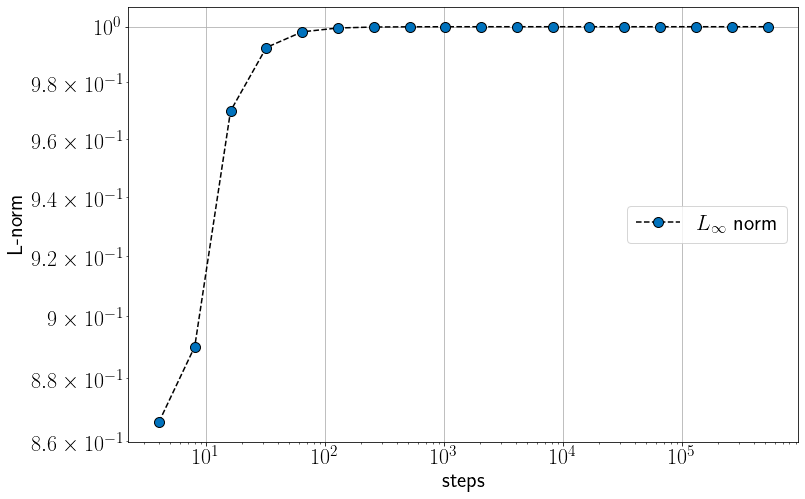

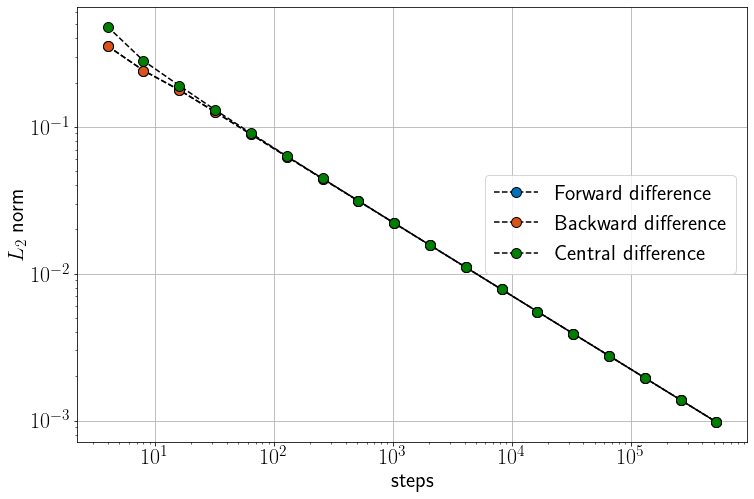

In [52]:
# Plot results and look at the qualitative agreement
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(12, 8))

plt.loglog(sizes, errLinfty, "--ko", markersize = 10, markerfacecolor=(0, 0.447, 0.741, 1), label = "$L_\infty$ norm")

plt.legend(loc="right")

plt.xlabel(r"steps")
plt.ylabel(r"L-norm")

plt.grid()
plt.show()


plt.figure(figsize=(12, 8))

plt.loglog(sizes, errL2FD, "--ko", markersize = 10, markerfacecolor=(0, 0.447, 0.741, 1), label = r"Forward difference")
plt.loglog(sizes, errL2BD, "--ko", markersize = 10, markerfacecolor=(0.85, 0.325, 0.098, 1), label = r"Backward difference")
plt.loglog(sizes, errL2CD, "--ko", markersize = 10, markerfacecolor='g', label = r"Central difference")

plt.legend(loc="right")

plt.xlabel(r"steps")
plt.ylabel(r"$L_2$ norm")

plt.grid()
plt.show()

**Exercise 2**: Modify the above procedure developed for forward differences to accommodate for backward and/or central differences. Discuss its convergence behaviour. If you have time, attempt higher order derivative implementations as well

In [21]:
help(np.diff)

Help on function diff in module numpy:

diff(a, n=1, axis=-1, prepend=<no value>, append=<no value>)
    Calculate the n-th discrete difference along the given axis.
    
    The first difference is given by ``out[i] = a[i+1] - a[i]`` along
    the given axis, higher differences are calculated by using `diff`
    recursively.
    
    Parameters
    ----------
    a : array_like
        Input array
    n : int, optional
        The number of times values are differenced. If zero, the input
        is returned as-is.
    axis : int, optional
        The axis along which the difference is taken, default is the
        last axis.
    prepend, append : array_like, optional
        Values to prepend or append to `a` along axis prior to
        performing the difference.  Scalar values are expanded to
        arrays with length 1 in the direction of axis and the shape
        of the input array in along all other axes.  Otherwise the
        dimension and shape must match `a` except along ax